In [16]:
# importing all packages used for ML and Stats

import os # operating system
import numpy as np # mathematical calculations
import pandas as pd # manupulation packages or import/export of files / datas
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # advanced data visualization with statistics 
%matplotlib inline
 # for data visualization to keep in proper format
sns.set() # for visualization in proper width height of graphs / diagrams
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_excel('Employee_Data.xls')
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [43]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [44]:
dataset.isnull().sum() / len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

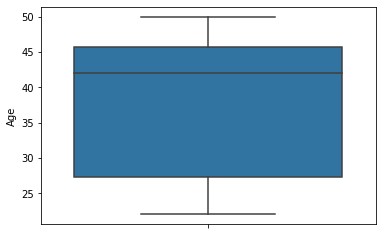

In [45]:
sns.boxplot(y='Age',data = dataset)
plt.show()


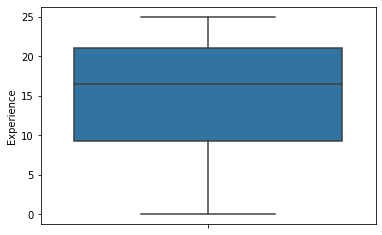

In [46]:
sns.boxplot(y='Experience',data = dataset)
plt.show()

In [47]:
dataset['Age'].mean()

37.97560975609756

In [48]:
dataset['Experience'].mean()

14.766666666666667

In [49]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [50]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())
dataset['Department'].value_counts()
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [51]:
dataset.isnull().sum() / len(dataset) * 100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age             0.0
Experience      0.0
Salary          0.0
dtype: float64

In [52]:
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [53]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [54]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

# Ecoding Aproach

### Approach 1 : Label Encoder

In [29]:
# Step 1 - access data of which need to define category

dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [31]:
# Step 2 - converting character into label (0,1,2.....)

dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [32]:
# dataset department converted into label encoder - 0,1,2

dataset['Department'].value_counts()

2    49
0    27
1    24
Name: Department, dtype: int64

In [33]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795


### Approach 2 : One Hot Encoder

In [55]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [56]:
# converting character in department to encoder using onehot encoder method

dataset = pd.get_dummies(dataset, columns = ['Department'])

In [57]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_Accounting,Department_Customer Relations,Department_Sales and Marketing
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0


### dummy variables (n-1)

In [ ]:
#removing one column as it sufficient for ML algorithm model to have two columns which indirectly interpret other removed column

dataset = dataset.iloc[:,0:8]

In [60]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_Accounting,Department_Customer Relations
0,1,Joy,Bass,28.0,3.0,32889,0,0
1,2,Sheila,Garza,22.0,1.0,15944,0,0
2,3,John,Bryant,22.0,1.0,40343,0,1
3,4,Christian,Farley,22.0,1.0,19018,0,1
4,5,Colorado,Bowen,27.0,0.0,24795,1,0


In [62]:
# its give all details of existing datas

dataset.describe()

,Employee Id,Age,Experience,Salary,Department_Accounting,Department_Customer Relations
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000,0.270000,0.240000
std,29.011492,8.606992,6.532050,26189.874212,0.446196,0.429235
min,1.000000,22.000000,0.000000,11830.000000,0.000000,0.000000
25%,25.750000,30.000000,10.000000,48526.000000,0.000000,0.000000
50%,50.500000,39.500000,15.000000,73500.500000,0.000000,0.000000
75%,75.250000,44.250000,20.000000,86621.250000,1.000000,0.000000
max,100.000000,50.000000,25.000000,98180.000000,1.000000,1.000000


# feature scaling

### Approach - 1 : Normalization

In [20]:
dataset1 = dataset.copy()
dataset1.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [21]:
dataset['Age'].mean()
dataset['Experience']
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())
dataset['Department'].value_counts()
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')
dataset1 = dataset1.iloc[:,4:7]
dataset1.head()

,Age,Experience,Salary
0,28.0,3.0,32889
1,22.0,1.0,15944
2,22.0,1.0,40343
3,22.0,1.0,19018
4,27.0,0.0,24795


In [26]:
from sklearn.preprocessing import Normalizer
x_nor = Normalizer()
x_norm = x_nor.fit_transform(dataset1)

In [27]:
pd.DataFrame(x_norm).head()

,0,1,2
0,0.000851,0.000091,1.000000
1,0.001380,0.000063,0.999999
2,0.000545,0.000025,1.000000
3,0.001157,0.000053,0.999999
4,0.001089,0.000000,0.999999


### Approach 2 - Standarization

In [31]:
from sklearn.preprocessing import StandardScaler # importing Standardization function
std_sc = StandardScaler() # 
std_sc1 = std_sc.fit_transform(dataset1)
pd.DataFrame(std_sc1).head()

,0,1,2
0,-1.164851,-1.810449,-1.234823
1,-1.865471,-2.118174,-1.885089
2,-1.865471,-2.118174,-0.948776
3,-1.865471,-2.118174,-1.767124
4,-1.281621,-2.272037,-1.545431
